<a href="https://colab.research.google.com/github/shipra-bhadauria/Deep-Learning_practice/blob/main/RNN_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3 Stock Price Prediction

In this part, you will create one of the most powerful Deep Learning models. We will even go as far as saying that you will create the Deep Learning model closest to “Artificial Intelligence”. Why is that? Because this model will have long-term memory, just like us, humans. 

The branch of Deep Learning which facilitates this is Recurrent Neural Networks. Classic RNNs have short memory, and were neither popular nor powerful for this exact reason. But a recent major improvement in Recurrent Neural Networks gave rise to the popularity of LSTMs (Long Short Term Memory RNNs) which has completely changed the playing field. 

In this part you will learn how to implement this ultra-powerful model, and we will take the challenge to use it to predict the real Google stock price.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
training_set = dataset_train.iloc[:, 1:2].values

feature scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

Creating a data structure with 60 timesteps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range (60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Part 2 - Building and Training the RNN

Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Initialising the RNN

In [ ]:
regressor = Sequential()

Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

Adding the output layer

In [ ]:
regressor.add(Dense(units=1))

#Compiling the RNN

In [ ]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0431
Epoch 2/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0059
Epoch 3/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0061
Epoch 4/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0043
Epoch 13/100


#Part 3 - Making the predictions and visualising the results

Getting the real stock price of 2017

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

#Getting the predicted stock price of 2017


In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transfrom(inputs)
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#Visualising the results

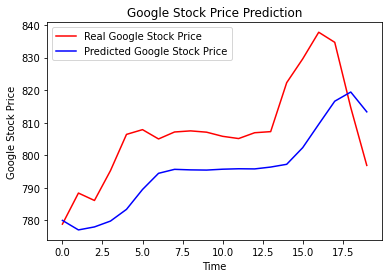

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()